# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Nguyễn Trọng Nhân
- MSSV: 22127306
- Lớp: 22CLC08

## Import các thư viện liên quan

In [51]:
from PIL import Image
import numpy as np
import random 
import matplotlib.pyplot as plt

## Helper functions

In [52]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''
    img = Image.open(img_path).convert('RGB')
    img_2d = np.array(img)
    return img_2d

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    image = Image.fromarray(img_2d, 'RGB')
    plt.imshow(image)
    plt.axis('off')  
    plt.show()

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''
    image = Image.fromarray(img_2d, 'RGB')
    image.save(img_path)

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''
    img_1d = img_2d.reshape(-1, 3)
    return img_1d

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    cluster = set()
    if init_centroids == 'random':
        while len(cluster) < k_clusters:
            candidate = tuple(img_1d[random.randint(0, len(img_1d) - 1)])
            if candidate not in cluster:
                cluster.add(candidate)
    else:
        while len(cluster) < k_clusters:
            candidate = tuple(np.random.randint(0, 256, 3))
            if candidate not in cluster:
                cluster.add(candidate)

    centroids = np.array(list(cluster))
    labels = np.array([0] * len(img_1d), dtype=int)
    
    while (max_iter):
        distance = np.linalg.norm(img_1d[:, np.newaxis, :] - centroids, axis=2)
        label = np.argmin(distance, axis=1)
        new_centroids = np.array([img_1d[label == i].mean(axis=0) if len(img_1d[label == i]) != 0 else centroids[i] for i in range(k_clusters)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        max_iter -= 1
    return centroids, label

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''
    img_2d = centroids[labels].reshape(img_2d_shape).astype(np.uint8)
    return img_2d
# Your additional functions here


## Your tests

In [53]:
# YOUR CODE HERE

## Main FUNCTION

In [54]:
def main():
    input_file = "test1.png"
    k_clusters = 15
    max_iter = 100
    type_of_centroids = random
    output_file = "test.png"
    
    img_2d = read_img(input_file)
    img_1d = convert_img_to_1d(img_2d)
    print(img_2d.shape)
    clusters, labels = kmeans(img_1d, k_clusters, max_iter, type_of_centroids)
    segmented_img_2d = generate_2d_img(img_2d.shape, clusters, labels)
    
    save_img(segmented_img_2d, output_file)
    show_img(segmented_img_2d)

(360, 640, 3)


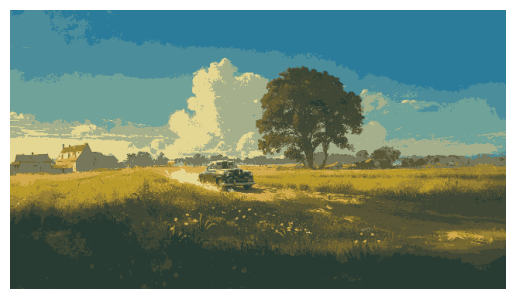

In [55]:
# Call main function
if __name__ == "__main__":
    main()